In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-ds-books/final_book_dataset_kaggle2.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
amazon = pd.read_csv('/kaggle/input/amazon-ds-books/final_book_dataset_kaggle2.csv')

In [4]:
amazon.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,NaN,NaN,NaN,NaN,4.2,31,61%,16%,14%,4%,5%,NaN,NaN,NaN,NaN,NaN,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360,4.6,72,75%,18%,2%,2%,2%,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90,408,4.7,205,84%,9%,4%,2%,NaN,8.5 x 0.92 x 11 inches,2.15 pounds,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,"[ Gunnar Carlsson, and , Mikael Vejdemo-Johan...",54.19,53.98 - 54.19,230,5.0,5,100%,NaN,NaN,NaN,NaN,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,"R in Action, Third Edition: Data analysis and ...",[ Robert I. Kabacoff],56.99,47.97 - 56.99,656,4.3,14,78%,11%,11%,NaN,NaN,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,"Manning; 3rd edition (May 3, 2022)",978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


The warnings you're seeing are RuntimeWarnings triggered by the Pandas formatting engine when it's trying to display your DataFrame amazon.head(10). These don't affect the actual data but are likely due to NaN (Not a Number), infinite, or extremely large/small float values in your DataFrame.

**Explanation of the Warning:**
These lines from the format.py script are trying to:

Check for values greater than 1e6 (1,000,000)

Check for values smaller than 10^(-digits) but greater than 0

**If your DataFrame contains:**

np.nan

np.inf / -np.inf

or combinations that result in undefined numerical behavior

...then such warnings can occur during internal comparisons.

In [5]:
amazon.shape

(830, 19)

In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

Seems like a lot of null values

In [7]:
amazon.describe()

,price,avg_reviews
count,722.000000,702.000000
mean,46.491537,4.472080
std,63.292394,0.409608
min,0.990000,1.000000
25%,23.725000,4.325000
50%,39.490000,4.500000
75%,51.990000,4.700000
max,1318.740000,5.000000


In [8]:
amazon.head(5)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [9]:
# Check the number of null values
amazon.isnull()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
827,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False
828,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False


In [10]:
amazon.isnull().sum()

title                             0
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

In [11]:
amazon.nunique()

title                           830
author                          605
price                           437
price (including used books)    523
pages                           376
avg_reviews                      22
n_reviews                       289
star5                            67
star4                            48
star3                            33
star2                            20
star1                            19
dimensions                      540
weight                          273
language                         12
publisher                       694
ISBN_13                         503
link                            830
complete_link                   830
dtype: int64

Handle columns which only has int/float data type

In [12]:
# Let's Target Price Column first
amazon['price'].isna().sum()

108

In [13]:
# Mean
amazon['price'].fillna(amazon['price'].mean()).head(10)

0     6.750000
1    33.720000
2    32.070000
3    53.990000
4    24.490000
5    46.491537
6    40.490000
7    90.000000
8    54.190000
9    56.990000
Name: price, dtype: float64

In [14]:
amazon['price'].fillna(amazon['price'].mean()).describe()

count     830.000000
mean       46.491537
std        59.025801
min         0.990000
25%        24.992500
50%        41.990000
75%        49.990000
max      1318.740000
Name: price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

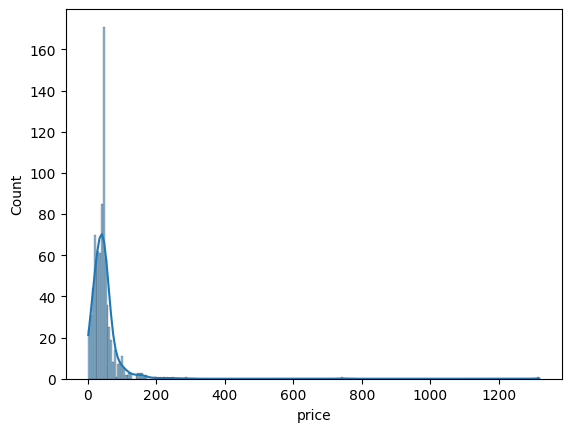

In [15]:
sns.histplot(amazon['price'].fillna(amazon['price'].mean()), kde = True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


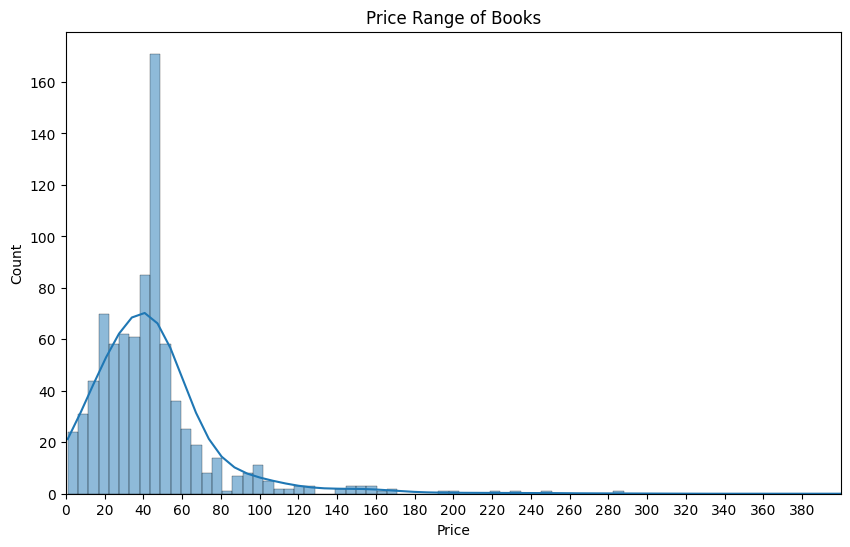

In [16]:
plt.figure(figsize = (10,6))

sns.histplot(amazon['price'].fillna(amazon['price'].mean()), kde = True)

plt.title('Price Range of Books')
plt.xlabel('Price')

plt.xlim(0,400)
plt.xticks(np.arange(0,400,20))

plt.show()



In [17]:
# Median
amazon['price'].fillna(amazon['price'].median()).head(10)

0     6.75
1    33.72
2    32.07
3    53.99
4    24.49
5    39.49
6    40.49
7    90.00
8    54.19
9    56.99
Name: price, dtype: float64

In [18]:
amazon['price'].fillna(amazon['price'].median()).describe()

count     830.000000
mean       45.580494
std        59.072842
min         0.990000
25%        24.992500
50%        39.490000
75%        49.990000
max      1318.740000
Name: price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

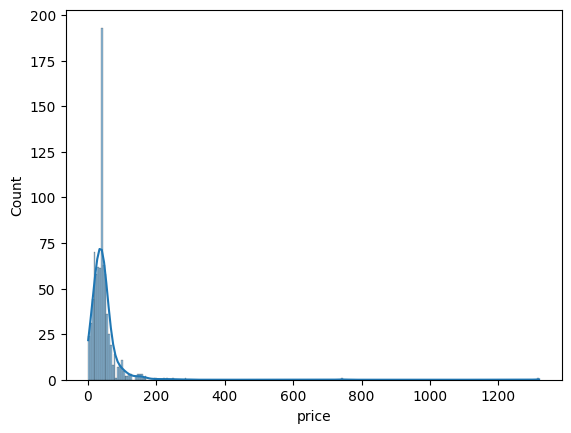

In [19]:
sns.histplot(amazon['price'].fillna(amazon['price'].median()), kde = True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


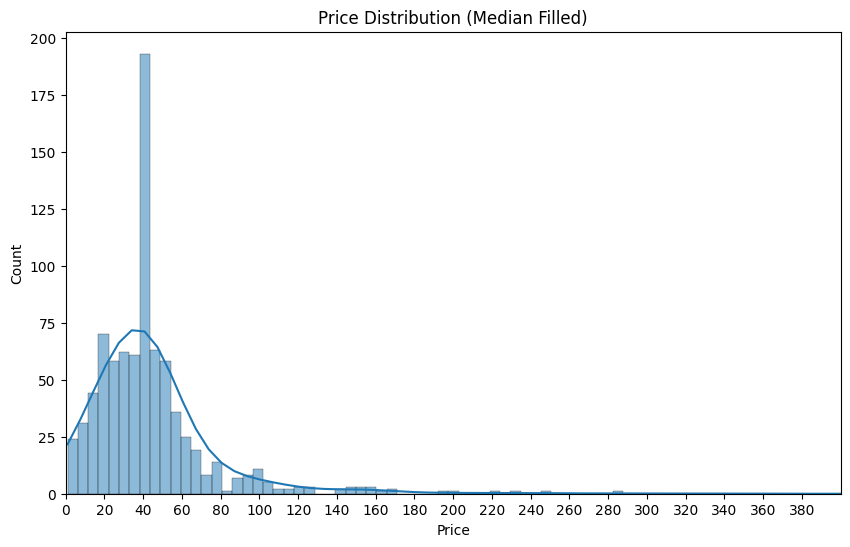

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(amazon['price'].fillna(amazon['price'].median()), kde=True)

plt.title('Price Distribution (Median Filled)')
plt.xlabel('Price')

# Set x-axis range
plt.xlim(0, 400)  # Adjust as needed

# Set custom tick intervals (e.g., every 200)
plt.xticks(np.arange(0, 400, 20))

plt.show()

Since, right-skewed, will consider "Median"

In [21]:
amazon.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,NaN,NaN,NaN,NaN,4.2,31,61%,16%,14%,4%,5%,NaN,NaN,NaN,NaN,NaN,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360,4.6,72,75%,18%,2%,2%,2%,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90,408,4.7,205,84%,9%,4%,2%,NaN,8.5 x 0.92 x 11 inches,2.15 pounds,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,"[ Gunnar Carlsson, and , Mikael Vejdemo-Johan...",54.19,53.98 - 54.19,230,5.0,5,100%,NaN,NaN,NaN,NaN,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,"R in Action, Third Edition: Data analysis and ...",[ Robert I. Kabacoff],56.99,47.97 - 56.99,656,4.3,14,78%,11%,11%,NaN,NaN,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,"Manning; 3rd edition (May 3, 2022)",978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


In [22]:
amazon['price'] = amazon['price'].fillna(amazon['price'].median())

In [23]:
amazon.head(10)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,NaN,39.49,NaN,NaN,4.2,31,61%,16%,14%,4%,5%,NaN,NaN,NaN,NaN,NaN,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360,4.6,72,75%,18%,2%,2%,2%,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90,408,4.7,205,84%,9%,4%,2%,NaN,8.5 x 0.92 x 11 inches,2.15 pounds,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,"[ Gunnar Carlsson, and , Mikael Vejdemo-Johan...",54.19,53.98 - 54.19,230,5.0,5,100%,NaN,NaN,NaN,NaN,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,"R in Action, Third Edition: Data analysis and ...",[ Robert I. Kabacoff],56.99,47.97 - 56.99,656,4.3,14,78%,11%,11%,NaN,NaN,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,"Manning; 3rd edition (May 3, 2022)",978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


In [24]:
amazon['price'].isnull().sum()

0

In [25]:
amazon.isnull().sum()

title                             0
author                          173
price                             0
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

In [26]:
amazon.dtypes

title                            object
author                           object
price                           float64
price (including used books)     object
pages                            object
avg_reviews                     float64
n_reviews                        object
star5                            object
star4                            object
star3                            object
star2                            object
star1                            object
dimensions                       object
weight                           object
language                         object
publisher                        object
ISBN_13                          object
link                             object
complete_link                    object
dtype: object

Next we will work on avg_reviews

In [27]:
amazon['avg_reviews'].head(20)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0     4.4
1     4.3
2     4.7
3     4.6
4     3.9
5     4.2
6     4.6
7     4.7
8     5.0
9     4.3
10    4.5
11    4.9
12    4.4
13    4.6
14    4.0
15    4.6
16    NaN
17    4.6
18    4.4
19    4.9
Name: avg_reviews, dtype: float64

In [28]:
amazon['avg_reviews'].describe()

count    702.000000
mean       4.472080
std        0.409608
min        1.000000
25%        4.325000
50%        4.500000
75%        4.700000
max        5.000000
Name: avg_reviews, dtype: float64

In [29]:
amazon['avg_reviews'].median()

4.5

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_reviews', ylabel='Count'>

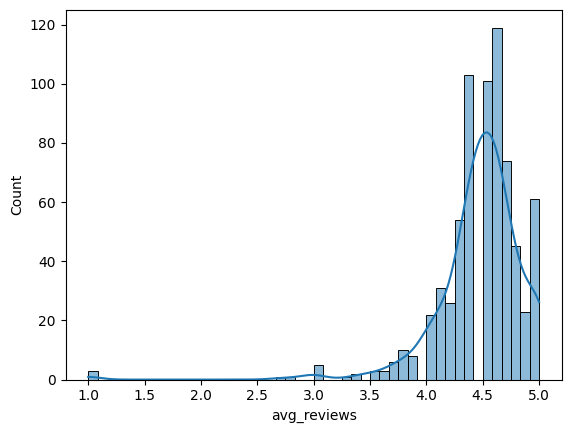

In [30]:
sns.histplot(amazon['avg_reviews'], kde = True)

In [31]:
amazon['avg_reviews'].fillna(amazon['avg_reviews'].mean())

0      4.40000
1      4.30000
2      4.70000
3      4.60000
4      3.90000
        ...   
825    4.50000
826    4.50000
827    4.80000
828    4.47208
829    4.70000
Name: avg_reviews, Length: 830, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Mean')

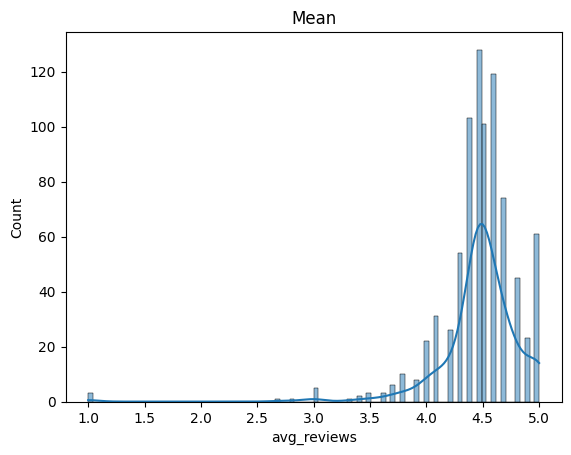

In [32]:
sns.histplot(amazon['avg_reviews'].fillna(amazon['avg_reviews'].mean()), kde = True)
plt.title('Mean')

In [33]:
amazon['avg_reviews'].fillna(amazon['avg_reviews'].median())

0      4.4
1      4.3
2      4.7
3      4.6
4      3.9
      ... 
825    4.5
826    4.5
827    4.8
828    4.5
829    4.7
Name: avg_reviews, Length: 830, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Median')

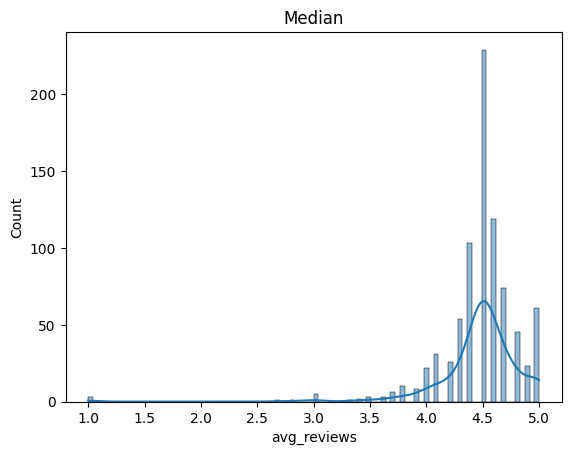

In [34]:
sns.histplot(amazon['avg_reviews'].fillna(amazon['avg_reviews'].median()), kde = True)
plt.title('Median')

In [35]:
amazon['avg_reviews'].fillna(amazon['avg_reviews'].median(), inplace = True)

/tmp/ipykernel_199/2473003333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['avg_reviews'].fillna(amazon['avg_reviews'].median(), inplace = True)


In [36]:
amazon['avg_reviews'].head(20)

0     4.4
1     4.3
2     4.7
3     4.6
4     3.9
5     4.2
6     4.6
7     4.7
8     5.0
9     4.3
10    4.5
11    4.9
12    4.4
13    4.6
14    4.0
15    4.6
16    4.5
17    4.6
18    4.4
19    4.9
Name: avg_reviews, dtype: float64

In [37]:
amazon['avg_reviews'].isnull().sum()

0

In [38]:
amazon.isnull().sum()

title                             0
author                          173
price                             0
price (including used books)    108
pages                            85
avg_reviews                       0
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

Successfully cleaned the columns having only float data type

In [39]:
amazon.describe()

,price,avg_reviews
count,830.000000,830.000000
mean,45.580494,4.476386
std,59.072842,0.376796
min,0.990000,1.000000
25%,24.992500,4.400000
50%,39.490000,4.500000
75%,49.990000,4.600000
max,1318.740000,5.000000


In [40]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         830 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   830 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

Now the data types that I need to tackle is object.

In [41]:
amazon.pages.apply(type).value_counts(0)

pages
<class 'str'>      745
<class 'float'>     85
Name: count, dtype: int64

In [42]:
amazon.pages[amazon.pages.apply(lambda x: isinstance(x,str))]

0      500
1      484
2      274
3      547
4      368
      ... 
822    165
824    280
825    208
826    573
827    288
Name: pages, Length: 745, dtype: object

In [43]:
amazon.pages[amazon.pages.apply(lambda x: isinstance(x,float))]

5      NaN
12     NaN
16     NaN
22     NaN
25     NaN
      ... 
818    NaN
820    NaN
823    NaN
828    NaN
829    NaN
Name: pages, Length: 85, dtype: object

In [44]:
amazon.pages.dropna()

0      500
1      484
2      274
3      547
4      368
      ... 
822    165
824    280
825    208
826    573
827    288
Name: pages, Length: 745, dtype: object

In [45]:
amazon.pages.fillna(0).head(20)

0     500
1     484
2     274
3     547
4     368
5       0
6     360
7     408
8     230
9     656
10    333
11    106
12      0
13    528
14    456
15    249
16      0
17    192
18    234
19    442
Name: pages, dtype: object

In [46]:
amazon.pages.fillna(0).apply(type).value_counts(0)

pages
<class 'str'>    745
<class 'int'>     85
Name: count, dtype: int64

In [47]:
# Convert the str to int

pd.to_numeric(amazon.pages, errors = 'coerce').fillna(0).astype(int)

0      500
1      484
2      274
3      547
4      368
      ... 
825    208
826    573
827    288
828      0
829      0
Name: pages, Length: 830, dtype: int64

In [48]:
pd.to_numeric(amazon.pages, errors = 'coerce').fillna(0).astype(int).apply(type).value_counts(0)

pages
<class 'int'>    830
Name: count, dtype: int64

In [49]:
amazon.pages = pd.to_numeric(amazon.pages, errors = 'coerce').fillna(0).astype(int)

In [50]:
amazon['pages'].head(10)

0    500
1    484
2    274
3    547
4    368
5      0
6    360
7    408
8    230
9    656
Name: pages, dtype: int64

In [51]:
amazon.pages.describe()

count     830.000000
mean      346.787952
std       256.017864
min         0.000000
25%       174.250000
50%       333.000000
75%       468.000000
max      2962.000000
Name: pages, dtype: float64

In [52]:
amazon.pages.mean()

346.7879518072289

In [53]:
amazon.pages.median()

333.0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pages', ylabel='Count'>

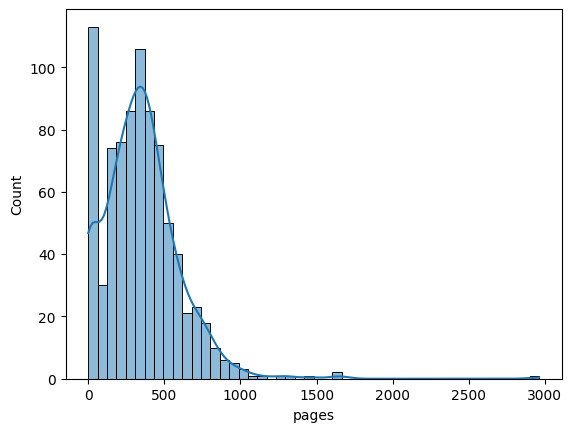

In [54]:
sns.histplot(amazon.pages, kde = True)

Pages can't be zero right, so we will take the median

In [55]:
mean_pages = amazon.pages[amazon.pages != 0].mean()
median_pages = amazon.pages[amazon.pages != 0].median()

In [56]:
mean_pages

391.07880434782606

In [57]:
median_pages

360.0

In [58]:
amazon.pages.replace(0,median_pages).astype(int).head(10)

0    500
1    484
2    274
3    547
4    368
5    360
6    360
7    408
8    230
9    656
Name: pages, dtype: int64

In [59]:
amazon.pages = amazon.pages.replace(0,median_pages).astype(int)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pages', ylabel='Count'>

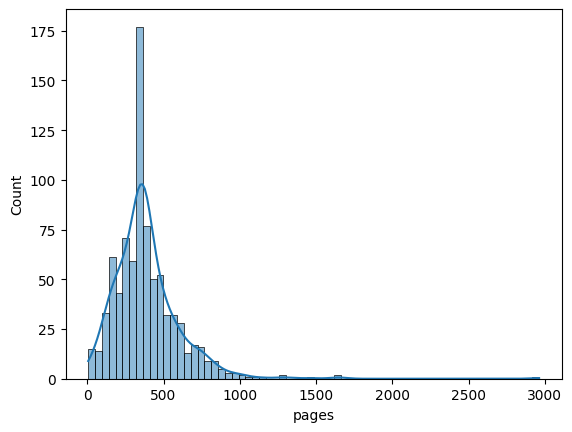

In [60]:
sns.histplot(amazon.pages, kde = True)

In [61]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         830 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         830 non-null    int64  
 5   avg_reviews                   830 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

n_reviews

In [62]:
amazon['n_reviews'].apply(type).value_counts(0)

n_reviews
<class 'str'>      702
<class 'float'>    128
Name: count, dtype: int64

In [63]:
amazon['n_reviews'][amazon['n_reviews'].apply(lambda x: isinstance(x,str))]

0         23
1        124
2         10
3      1,686
4         12
       ...  
824      404
825       74
826       93
827        8
829      142
Name: n_reviews, Length: 702, dtype: object

In [64]:
amazon['n_reviews'][amazon['n_reviews'].apply(lambda x: isinstance(x,float))]

16     NaN
23     NaN
25     NaN
28     NaN
30     NaN
      ... 
816    NaN
817    NaN
818    NaN
822    NaN
828    NaN
Name: n_reviews, Length: 128, dtype: object

In [65]:
pd.to_numeric(amazon['n_reviews'], errors = 'coerce').fillna(0).astype(int)

0       23
1      124
2       10
3        0
4       12
      ... 
825     74
826     93
827      8
828      0
829    142
Name: n_reviews, Length: 830, dtype: int64

In [66]:
amazon['n_reviews'] = pd.to_numeric(amazon['n_reviews'], errors = 'coerce').fillna(0).astype(int)

In [67]:
amazon['n_reviews'].head(10)

0     23
1    124
2     10
3      0
4     12
5     31
6     72
7    205
8      5
9     14
Name: n_reviews, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_reviews', ylabel='Count'>

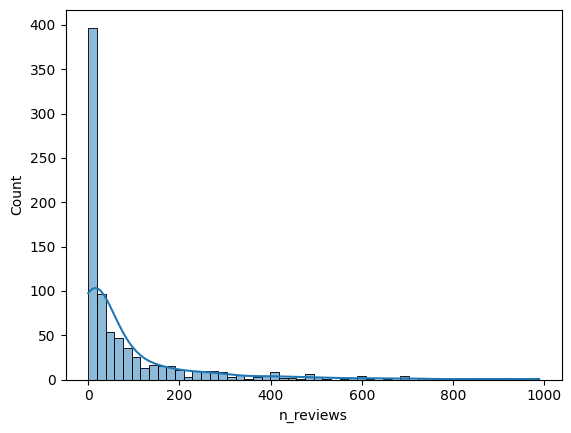

In [68]:
sns.histplot(amazon['n_reviews'], kde = True)

In [69]:
mean_review = amazon.n_reviews[amazon.n_reviews != 0].mean()
median_review = amazon.n_reviews[amazon.n_reviews != 0].median()

In [70]:
mean_review

108.17557251908397

In [71]:
median_review

40.0

From the csv table, the outliers are the big numbers, therefore, select median

In [72]:
amazon.n_reviews.replace(0,median_review).astype(int).head(10)

0     23
1    124
2     10
3     40
4     12
5     31
6     72
7    205
8      5
9     14
Name: n_reviews, dtype: int64

In [73]:
amazon.n_reviews = amazon.n_reviews.replace(0,median_review).astype(int)

In [74]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         830 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         830 non-null    int64  
 5   avg_reviews                   830 non-null    float64
 6   n_reviews                     830 non-null    int64  
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [75]:
amazon['star5'].apply(type).value_counts(0)

star5
<class 'str'>      702
<class 'float'>    128
Name: count, dtype: int64

In [76]:
amazon['star4'].apply(type).value_counts(0)

star4
<class 'str'>      635
<class 'float'>    195
Name: count, dtype: int64

In [77]:
amazon['star3'].apply(type).value_counts(0)

star3
<class 'str'>      554
<class 'float'>    276
Name: count, dtype: int64

In [78]:
amazon['star2'].apply(type).value_counts(0)

star2
<class 'str'>      451
<class 'float'>    379
Name: count, dtype: int64

In [79]:
amazon['star1'].apply(type).value_counts(0)

star1
<class 'float'>    502
<class 'str'>      328
Name: count, dtype: int64

In [80]:
amazon['star5'][amazon['star5'].apply(lambda x: isinstance(x,str))]

0      55%
1      61%
2      87%
3      75%
4      52%
      ... 
824    67%
825    72%
826    78%
827    83%
829    79%
Name: star5, Length: 702, dtype: object

In [81]:
amazon['star5'][amazon['star5'].apply(lambda x: isinstance(x,float))]

16     NaN
23     NaN
25     NaN
28     NaN
30     NaN
      ... 
816    NaN
817    NaN
818    NaN
822    NaN
828    NaN
Name: star5, Length: 128, dtype: object

In [82]:
# Convert str to float

amazon['star5'].str.rstrip('%').astype(float).head(5)

0    55.0
1    61.0
2    87.0
3    75.0
4    52.0
Name: star5, dtype: float64

In [83]:
amazon['star5'] = amazon['star5'].str.rstrip('%').astype(float)
amazon['star4'] = amazon['star4'].str.rstrip('%').astype(float)
amazon['star3'] = amazon['star3'].str.rstrip('%').astype(float)
amazon['star2'] = amazon['star2'].str.rstrip('%').astype(float)
amazon['star1'] = amazon['star1'].str.rstrip('%').astype(float)

In [84]:
amazon['star5'] = amazon['star5'].fillna(0).astype(float)
amazon['star4'] = amazon['star4'].fillna(0).astype(float)
amazon['star3'] = amazon['star3'].fillna(0).astype(float)
amazon['star2'] = amazon['star2'].fillna(0).astype(float)
amazon['star1'] = amazon['star1'].fillna(0).astype(float)

In [85]:
amazon.star5.apply(type).value_counts(0)

star5
<class 'float'>    830
Name: count, dtype: int64

In [86]:
amazon.star4.apply(type).value_counts(0)

star4
<class 'float'>    830
Name: count, dtype: int64

In [87]:
amazon.star3.apply(type).value_counts(0)

star3
<class 'float'>    830
Name: count, dtype: int64

In [88]:
amazon.star2.apply(type).value_counts(0)

star2
<class 'float'>    830
Name: count, dtype: int64

In [89]:
amazon.star1.apply(type).value_counts(0)

star1
<class 'float'>    830
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='star5', ylabel='Count'>

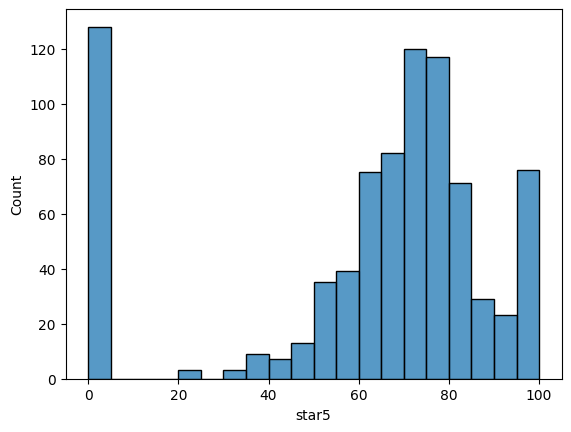

In [90]:
sns.histplot(amazon.star5)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='star4', ylabel='Count'>

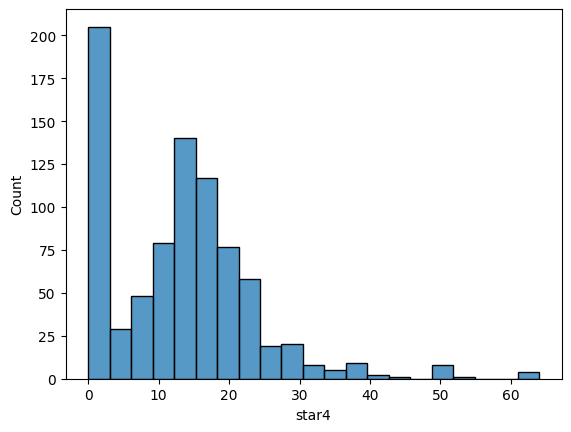

In [91]:
sns.histplot(amazon.star4)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='star3', ylabel='Count'>

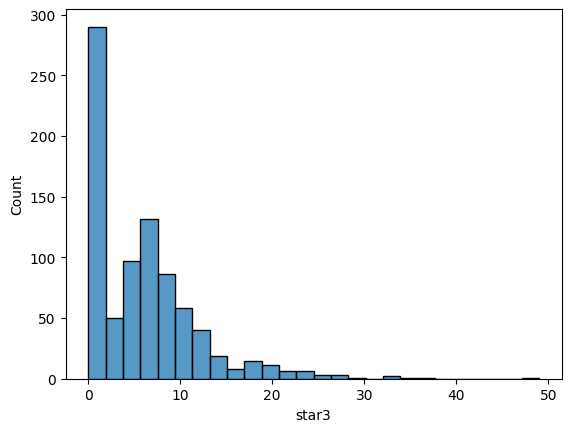

In [92]:
sns.histplot(amazon.star3)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='star2', ylabel='Count'>

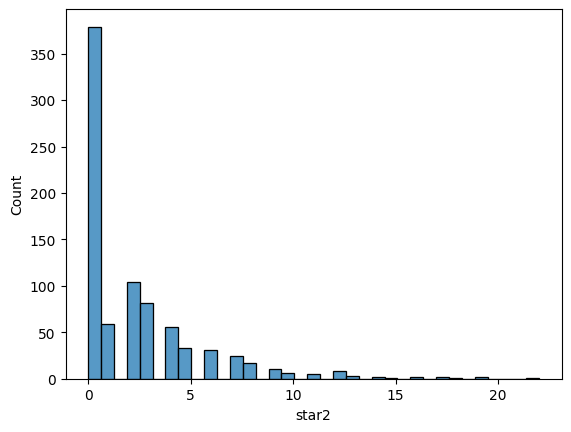

In [93]:
sns.histplot(amazon.star2)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='star1', ylabel='Count'>

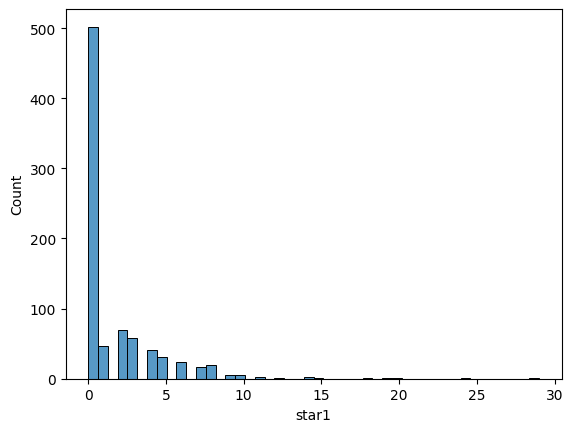

In [94]:
sns.histplot(amazon.star1)

In all cases, it is better to take the median

In [95]:
amazon.star5.replace(0,amazon['star5'].median()).head(20)

0      55.0
1      61.0
2      87.0
3      75.0
4      52.0
5      61.0
6      75.0
7      84.0
8     100.0
9      78.0
10     73.0
11     91.0
12     63.0
13     81.0
14     48.0
15     72.0
16     70.0
17     74.0
18     73.0
19     90.0
Name: star5, dtype: float64

In [96]:
amazon.star5.head(20)

0      55.0
1      61.0
2      87.0
3      75.0
4      52.0
5      61.0
6      75.0
7      84.0
8     100.0
9      78.0
10     73.0
11     91.0
12     63.0
13     81.0
14     48.0
15     72.0
16      0.0
17     74.0
18     73.0
19     90.0
Name: star5, dtype: float64

In [97]:
amazon.star5 = amazon.star5.replace(0,amazon['star5'].median())
amazon.star4 = amazon.star4.replace(0,amazon['star4'].median())
amazon.star3 = amazon.star3.replace(0,amazon['star3'].median())
amazon.star2 = amazon.star2.replace(0,amazon['star2'].median())
amazon.star1 = amazon.star1.replace(0,amazon['star1'].median())

In [98]:
amazon.head(20)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55.0,39.0,6.0,1.0,0.0,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61.0,20.0,9.0,4.0,6.0,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87.0,13.0,5.0,1.0,0.0,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,40,75.0,16.0,5.0,2.0,2.0,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52.0,17.0,10.0,10.0,10.0,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,NaN,39.49,NaN,360,4.2,31,61.0,16.0,14.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360,4.6,72,75.0,18.0,2.0,2.0,2.0,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90,408,4.7,205,84.0,9.0,4.0,2.0,0.0,8.5 x 0.92 x 11 inches,2.15 pounds,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,"[ Gunnar Carlsson, and , Mikael Vejdemo-Johan...",54.19,53.98 - 54.19,230,5.0,5,100.0,13.0,5.0,1.0,0.0,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,"R in Action, Third Edition: Data analysis and ...",[ Robert I. Kabacoff],56.99,47.97 - 56.99,656,4.3,14,78.0,11.0,11.0,1.0,0.0,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,"Manning; 3rd edition (May 3, 2022)",978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


In [99]:
# df['col'] = df['col'].astype(str) + '%'
amazon.star5 = amazon.star5.astype(str) + '%'

In [100]:
amazon.star4 = amazon.star4.astype(str) + '%'
amazon.star3 = amazon.star3.astype(str) + '%'
amazon.star2 = amazon.star2.astype(str) + '%'
amazon.star1 = amazon.star1.astype(str) + '%'

In [101]:
amazon.head(5)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55.0%,39.0%,6.0%,1.0%,0.0%,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61.0%,20.0%,9.0%,4.0%,6.0%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87.0%,13.0%,5.0%,1.0%,0.0%,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,40,75.0%,16.0%,5.0%,2.0%,2.0%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52.0%,17.0%,10.0%,10.0%,10.0%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [102]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         830 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         830 non-null    int64  
 5   avg_reviews                   830 non-null    float64
 6   n_reviews                     830 non-null    int64  
 7   star5                         830 non-null    object 
 8   star4                         830 non-null    object 
 9   star3                         830 non-null    object 
 10  star2                         830 non-null    object 
 11  star1                         830 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

Now consider the missing values under author, language and publisher

In [103]:
# Since author can be anyone
'''
df['author'] = df['author'].fillna('Unknown Author')
df['language'] = df['language'].fillna('Unspecified')
df['publisher'] = df['publisher'].fillna('No Publisher Info')
'''

amazon.author = amazon.author.fillna('Unknown')

In [104]:
amazon.author.isnull().sum()

0

In [105]:
lang_mode = amazon.language.mode()[0]

In [106]:
lang_mode

'English'

In [107]:
amazon.language = amazon.language.fillna(lang_mode)

In [108]:
amazon.language.isnull().sum()

0

In [109]:
amazon.publisher = amazon.publisher.fillna('Unknown')

In [110]:
amazon.publisher.isnull().sum()

0

In [111]:
amazon.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55.0%,39.0%,6.0%,1.0%,0.0%,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,Unknown,33.72,21.49 - 33.72,484,4.3,124,61.0%,20.0%,9.0%,4.0%,6.0%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87.0%,13.0%,5.0%,1.0%,0.0%,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,40,75.0%,16.0%,5.0%,2.0%,2.0%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52.0%,17.0%,10.0%,10.0%,10.0%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [112]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        830 non-null    object 
 2   price                         830 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         830 non-null    int64  
 5   avg_reviews                   830 non-null    float64
 6   n_reviews                     830 non-null    int64  
 7   star5                         830 non-null    object 
 8   star4                         830 non-null    object 
 9   star3                         830 non-null    object 
 10  star2                         830 non-null    object 
 11  star1                         830 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

Remaining:
1. price (including used books)
2. dimensions
3. weight
4. ISBN_13

In [113]:
amazon.ISBN_13 = amazon.ISBN_13.fillna('Unknown')
amazon.ISBN_13.isnull().sum()

0

In [114]:
amazon['price (including used books)'].apply(type).value_counts(0)

price (including used books)
<class 'str'>      722
<class 'float'>    108
Name: count, dtype: int64

In [115]:
amazon['price (including used books)'][amazon['price (including used books)'].apply(lambda x: isinstance(x,str))]

0                 6.75
1       21.49 - 33.72 
2                32.07
3                53.99
4                24.49
            ...       
824               9.69
825      8.55 - 35.33 
826     52.41 - 55.18 
827              44.99
829              38.49
Name: price (including used books), Length: 722, dtype: object

In [116]:
amazon['price (including used books)'][amazon['price (including used books)'].apply(lambda x: isinstance(x,float))]

5      NaN
12     NaN
16     NaN
28     NaN
34     NaN
      ... 
800    NaN
816    NaN
817    NaN
818    NaN
828    NaN
Name: price (including used books), Length: 108, dtype: object

In [117]:
'''
def parse_to_float(val):
    if pd.isna(val):
        return np.nan  # leave NaN unchanged
    elif isinstance(val, str):
        if '-' in val:
            try:
                start, end = map(float, val.split('-')) # map(float, ['3.0 ', ' 5.5']) → [3.0, 5.5]
                return (start + end) / 2
            except:
                return np.nan
        else:
            try:
                return float(val)  # convert simple numeric string
            except:
                return np.nan
    return val  # already float, keep it
'''

def convert(val):
    if pd.isna(val):
        return np.nan
    elif isinstance(val,str):
        if '-' in val:
            try:
                start, end = map(float, val.split('-'))
                return (start+end)/2
            except:
                return np.nan
        else:
            try:
                return float(val)
            except:
                return np.nan
    return val
                 

In [118]:
amazon['price (including used books)'].head()

0               6.75
1     21.49 - 33.72 
2              32.07
3              53.99
4              24.49
Name: price (including used books), dtype: object

In [119]:
amazon['price (including used books)'].apply(convert).head()

0     6.750
1    27.605
2    32.070
3    53.990
4    24.490
Name: price (including used books), dtype: float64

In [120]:
amazon['price (including used books)'] = amazon['price (including used books)'].apply(convert)

In [121]:
amazon['price (including used books)'].apply(type).value_counts(0)

price (including used books)
<class 'float'>    830
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x2000 with 0 Axes>

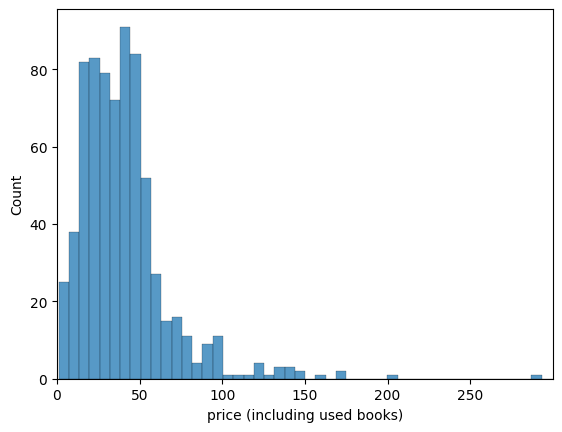

<Figure size 1000x2000 with 0 Axes>

In [122]:
sns.histplot(amazon['price (including used books)'])

plt.xlim(0,300)
plt.xticks(np.arange(0,300,50))
plt.figure(figsize = (10,20))

In [123]:
amazon['price (including used books)'].fillna(amazon['price (including used books)'].median(), inplace = True)

/tmp/ipykernel_199/3866409630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['price (including used books)'].fillna(amazon['price (including used books)'].median(), inplace = True)


In [124]:
amazon.head(20)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.750,500,4.4,23,55.0%,39.0%,6.0%,1.0%,0.0%,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,Unknown,33.72,27.605,484,4.3,124,61.0%,20.0%,9.0%,4.0%,6.0%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.070,274,4.7,10,87.0%,13.0%,5.0%,1.0%,0.0%,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.990,547,4.6,40,75.0%,16.0%,5.0%,2.0%,2.0%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.490,368,3.9,12,52.0%,17.0%,10.0%,10.0%,10.0%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,Unknown,39.49,36.990,360,4.2,31,61.0%,16.0%,14.0%,4.0%,5.0%,NaN,NaN,English,Unknown,Unknown,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.490,360,4.6,72,75.0%,18.0%,2.0%,2.0%,2.0%,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90.000,408,4.7,205,84.0%,9.0%,4.0%,2.0%,0.0%,8.5 x 0.92 x 11 inches,2.15 pounds,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,"[ Gunnar Carlsson, and , Mikael Vejdemo-Johan...",54.19,54.085,230,5.0,5,100.0%,13.0%,5.0%,1.0%,0.0%,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,"R in Action, Third Edition: Data analysis and ...",[ Robert I. Kabacoff],56.99,52.480,656,4.3,14,78.0%,11.0%,11.0%,1.0%,0.0%,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,"Manning; 3rd edition (May 3, 2022)",978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


Weight

In [125]:
'''
def convert_weight_to_pounds(val):
    if pd.isna(val):
        return np.nan
    val = val.strip().lower()
    if 'ounce' in val:
        num = float(val.replace('ounces', '').replace('ounce', '').strip())
        return num / 16  # 16 ounces = 1 pound
    elif 'pound' in val:
        return float(val.replace('pounds', '').replace('pound', '').strip())
    else:
        return np.nan  # for anything unexpected
'''

def convert_to_pounds(val):
    if pd.isna(val):
        return np.nan
    val = val.strip().lower()
    if 'ounce' in val:
        num = float(val.replace('ounces', '').replace('ounce', '').strip())
        return num/16 # 1 ounce = 1/16 pounds
    elif 'pound' in val:
        return float(val.replace('pounds','').replace('pound','').strip())
    else:
        return np.nan

In [126]:
amazon.weight = amazon.weight.apply(convert_to_pounds)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x2000 with 0 Axes>

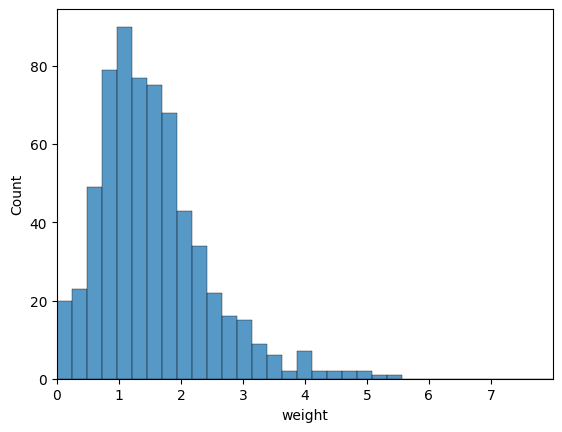

<Figure size 1000x2000 with 0 Axes>

In [127]:
sns.histplot(amazon.weight)
plt.xlim(0,8)
plt.xticks(np.arange(0,8,1))
plt.figure(figsize = (10,20))

In [128]:
amazon.weight = amazon.weight.fillna(amazon.weight.median())

In [129]:
amazon.weight.isnull().sum()

0

In [130]:
amazon.weight.head(5)

0    2.53
1    1.96
2    1.40
3    1.47
4    1.30
Name: weight, dtype: float64

In [131]:
# df['col'] = df['col'].astype(str) + '%'
amazon.weight = amazon.weight.astype(str) + ' pounds'

In [132]:
amazon.weight.head(5)

0    2.53 pounds
1    1.96 pounds
2     1.4 pounds
3    1.47 pounds
4     1.3 pounds
Name: weight, dtype: object

Dimensions

In [133]:
# ---- STEP 1: Function to extract L, W, H from dimensions ----
def extract_dimensions(value):
    if pd.isna(value):
        return [np.nan, np.nan, np.nan]

    # Remove weight info and keep only the part before ';'
    part = value.split(';')[0].lower().strip()

    # Remove units like "inches" or "inch"
    part = part.replace('inches', '').replace('inch', '').strip()

    # Try to parse values split by 'x'
    try:
        parts = [float(p.strip()) for p in part.split('x')]
        if len(parts) == 3:
            return parts
    except:
        pass

    return [np.nan, np.nan, np.nan]

# ---- STEP 2: Apply function to extract L, W, H ----
dim_df = amazon['dimensions'].apply(extract_dimensions).apply(pd.Series)
dim_df.columns = ['L', 'W', 'H']

# ---- STEP 3: Combine with original DataFrame ----
amazon = pd.concat([amazon, dim_df], axis=1)

# ---- STEP 4: Fill missing L, W, H with column means ----
amazon[['L', 'W', 'H']] = amazon[['L', 'W', 'H']].fillna(amazon[['L', 'W', 'H']].mean())

# ---- STEP 5: Optionally round values ----
amazon[['L', 'W', 'H']] = amazon[['L', 'W', 'H']].round(2)

# ---- STEP 6: Combine L, W, H back into "L x W x H inches" string ----
amazon['dimensions_cleaned'] = amazon.apply(
    lambda row: f"{row['L']} x {row['W']} x {row['H']} inches", axis=1
)

# ---- DONE ----
print(amazon[['dimensions', 'dimensions_cleaned']])

                    dimensions         dimensions_cleaned
0       8.5 x 1.01 x 11 inches   8.5 x 1.01 x 11.0 inches
1       8 x 0.98 x 9.25 inches   8.0 x 0.98 x 9.25 inches
2    8.25 x 0.6 x 10.75 inches  8.25 x 0.6 x 10.75 inches
3       7 x 1.11 x 9.19 inches   7.0 x 1.11 x 9.19 inches
4    7.38 x 0.83 x 9.25 inches  7.38 x 0.83 x 9.25 inches
..                         ...                        ...
825       7 x 0.47 x 10 inches   7.0 x 0.47 x 10.0 inches
826  6.14 x 1.25 x 9.21 inches  6.14 x 1.25 x 9.21 inches
827   7.5 x 0.65 x 9.25 inches   7.5 x 0.65 x 9.25 inches
828                        NaN  7.03 x 1.14 x 9.09 inches
829                        NaN  7.03 x 1.14 x 9.09 inches

[830 rows x 2 columns]


In [134]:
amazon.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,...,weight,language,publisher,ISBN_13,link,complete_link,L,W,H,dimensions_cleaned
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.750,500,4.4,23,55.0%,39.0%,6.0%,...,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...,8.50,1.01,11.00,8.5 x 1.01 x 11.0 inches
1,Head First Data Analysis: A learner's guide to...,Unknown,33.72,27.605,484,4.3,124,61.0%,20.0%,9.0%,...,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...,8.00,0.98,9.25,8.0 x 0.98 x 9.25 inches
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.070,274,4.7,10,87.0%,13.0%,5.0%,...,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...,8.25,0.60,10.75,8.25 x 0.6 x 10.75 inches
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.990,547,4.6,40,75.0%,16.0%,5.0%,...,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...,7.00,1.11,9.19,7.0 x 1.11 x 9.19 inches
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.490,368,3.9,12,52.0%,17.0%,10.0%,...,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...,7.38,0.83,9.25,7.38 x 0.83 x 9.25 inches
